In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
df_factors = pd.read_csv("Archive/sepsis2_task1_training/sepsis2_task1_master_training.csv")
df_labels = pd.read_csv("Archive/sepsis2_task1_training/sepsis2_task1_label_training.csv")
df_labels = df_labels.drop(columns = ["adm_id"])
df = pd.concat([df_factors,df_labels],axis =1)


In [10]:
gender_dum = pd.get_dummies(df.gender,prefix = "gender")
race_dum = pd.get_dummies(df.race,prefix = "race")
adtype_dum = pd.get_dummies(df.admission_type, prefix = "adtype")
adsource_dum = pd.get_dummies(df.admission_source, prefix = "adsource")
care_dum = pd.get_dummies(df.care_setting, prefix = "care")
age_dum = pd.get_dummies(df.age_grp, prefix = "age")
df = pd.concat([df,gender_dum,race_dum,adtype_dum,adsource_dum,care_dum,age_dum],axis = 1)
df = df.drop(columns = ["adm_id","gender","race","admission_type","admission_source","care_setting","age_grp"])

In [11]:
y = df.sepsis2
x_data = df.drop(columns=["sepsis2"])

In [12]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [13]:
accuracies={}
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
accuracies['Logistic Regression'] = acc
# np.size(x)
# lr.predict(x_test.T)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
knn = KNeighborsClassifier()
knn.n_neighbots = 2
knn.fit(x_train,y_train)
acc = knn.score(x_test,y_test)*100
accuracies['KNN'] = acc
print("Test Accuracy of KNN Algorithm: {:.2f}%".format(acc))

Test Accuracy of KNN Algorithm: 66.20%


In [15]:
svm = SVC(random_state = 1,verbose=True)
svm.fit(x_train, y_train)
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

[LibSVM]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Test Accuracy of SVM Algorithm: 70.94%


In [16]:
nb = GaussianNB()
nb.fit(x_train, y_train)
acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 65.91%


In [17]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 70.07%


In [18]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 69.91%


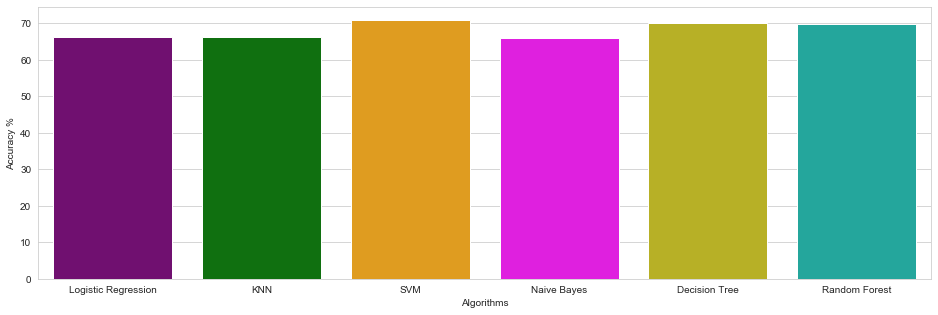

In [19]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()